# MVP
<br>

### MVP for Regression Project
<br>

##### Project Description:
- We are looking to predict 1st Day Closing Stock Price for companies going public

In [12]:
import pandas as pd
import seaborn as sns
import plotly as plty
import numpy as np

In [69]:
# Load our data

df = pd.read_csv('Data/first_day_performance_merged.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,open,high,low,close,adjclose,volume,...,Net Income,Total Assets,Total Liabilities,Stockholders' Equity,Auditor,CompanyCounsel,LeadUnderwriter,TransferAgent,UnderwriterCounsel,Underwriter
0,0,93,2,1997-02-06,10.187500,10.375000,10.125000,10.312500,10.312500,2238200.0,...,"$4,523,000.00","$183,877,000.00","$199,601,000.00","($15,724,000.00)",KPMG LLP,"McGuire, Woods, Battle and Boothe, L.L.P",Morgan Stanley & Co. Incorporated,"Norwest Bank, N.A",Simpson Thacher and Bartlett,"Wheat First Securities, Inc"
1,1,859,1,1997-04-10,71.260002,71.260002,71.260002,71.260002,71.260002,0.0,...,"$1,565,000.00","$27,447,000.00","$25,356,000.00","($950,000.00)",Price Waterhouse LLP,O'Melveny and Myers LLP,"Morgan Keegan and Co., Inc",U. S. Stock Transfer Corp,Gibson Dunn and Crutcher LLP,"Crowell, Weedon and Co"
2,2,1309,1,1997-04-25,10.125000,10.250000,9.000000,10.125000,10.125000,2772300.0,...,"-$1,440,771.00","$2,463,589.00","$4,348,727.00","($1,885,138.00)",Coopers and Lybrand L.L.P,Snow Becker Krauss P.C,Maidstone Financial,Continental Stock Transfer & Trust Company,"Gersten, Savage, Kaplowitz, Fredericks and Cur...",NaN
3,3,1502,1,1997-05-15,8.000000,8.687500,7.468750,7.875000,7.875000,8079600.0,...,"$388,000.00","$23,843,000.00","$34,908,000.00","($11,065,000.00)",Coopers and Lybrand L.L.P,"Wilson Sonsini Goodrich & Rosati, Professional...",Morgan Stanley & Co. Incorporated,"EquiServe Trust Company, N.A.",Fenwick & West LLP,"Robertson Stephens, Inc"
4,4,1694,1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000.0,...,"-$3,038,000.00","$11,722,000.00","$8,959,000.00","$2,763,000.00",Ernst & Young LLP,Perkins Coie LLP,Deutsche Morgan Grenfell Inc,"ChaseMellon Shareholder Services, L.L.C","Wilson Sonsini Goodrich & Rosati, Professional...",Hambrecht and Quist LLC


In [14]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'date', 'open', 'high',
       'low', 'close', 'adjclose', 'volume', 'ticker', 'days_post_ipo',
       'price_change', 'proposedTickerSymbol', 'Proposed Symbol',
       'Company Name', 'Exchange', 'Share Price', 'Employees', 'Status',
       'Shares Offered', 'Offer amount', 'Shares Over Alloted',
       'Company Address', 'Company Phone', 'Company Website', 'CEO',
       'State of Inc', 'Fiscal Year End', 'Total Offering Expense',
       'Shareholder Shares Offered', 'Shares Outstanding',
       'Lockup Period (days)', 'Lockup Expiration', 'Quiet Period Expiration',
       'CIK', 'DealId', 'company_description', 'Revenue', 'first_filing_type',
       'first_filing_date', 'first_filing_link', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders' Equity', 'Auditor',
       'CompanyCounsel', 'LeadUnderwriter', 'TransferAgent',
       'UnderwriterCounsel', 'Underwriter'],
      dtype='object')

In [15]:
df[[ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']].head()

,price_change,Share Price,Employees,Shares Offered,Offer amount,Total Offering Expense,Shares Outstanding,Lockup Period (days),Revenue,Net Income,Total Assets,Total Liabilities,Stockholders' Equity
0,0.976331,$20.00,1368 (as of 11/30/1996),21860000.0,"$437,200,000","$1,101,449.00","21,860,000",180,"$375,319,000.00","$4,523,000.00","$183,877,000.00","$199,601,000.00","($15,724,000.00)"
1,0.966106,$7,240 (as of 12/31/1996),3370000.0,"$23,590,000","$720,000.00","7,500,000",180,"$38,966,000.00","$1,565,000.00","$27,447,000.00","$25,356,000.00","($950,000.00)"
2,1.117180,$3.50,5 (as of 04/01/1997),1500000.0,"$5,250,000","$698,000.00","2,621,054",180,"$461,131.00","-$1,440,771.00","$2,463,589.00","$4,348,727.00","($1,885,138.00)"
3,1.041322,$12,108 (as of 12/31/1996),2750000.0,"$33,000,000","$1,100,000.00",21453651,180,"$11,425,000.00","$388,000.00","$23,843,000.00","$34,908,000.00","($11,065,000.00)"
4,0.882979,$16.00,256 (as of 03/31/1997),3000000.0,"$48,000,000","$850,000.00",23858702,180,"$16,005,000.00","-$3,038,000.00","$11,722,000.00","$8,959,000.00","$2,763,000.00"


### We Need to Clean some of our variables before they can be used
- Remove Characters
- Convert to float

In [70]:

df.Employees = df.Employees.str.split(' ', expand=True)[0]

df[[ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']] = df[[ 
              'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']].replace('[^.0-9\(-)]', '', regex=True
       ).replace('\(', '', regex=True).replace('\)', '', regex=True
       ).replace('', np.nan, regex=True).astype(float)

df[[ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']].head()

,price_change,Share Price,Employees,Shares Offered,Offer amount,Total Offering Expense,Shares Outstanding,Lockup Period (days),Revenue,Net Income,Total Assets,Total Liabilities,Stockholders' Equity
0,0.976331,20.0,1368.0,21860000.0,437200000.0,1101449.0,21860000.0,180.0,375319000.0,4523000.0,183877000.0,199601000.0,15724000.0
1,0.966106,7.0,240.0,3370000.0,23590000.0,720000.0,7500000.0,180.0,38966000.0,1565000.0,27447000.0,25356000.0,950000.0
2,1.117180,3.5,5.0,1500000.0,5250000.0,698000.0,2621054.0,180.0,461131.0,1440771.0,2463589.0,4348727.0,1885138.0
3,1.041322,12.0,108.0,2750000.0,33000000.0,1100000.0,21453651.0,180.0,11425000.0,388000.0,23843000.0,34908000.0,11065000.0
4,0.882979,16.0,256.0,3000000.0,48000000.0,850000.0,23858702.0,180.0,16005000.0,3038000.0,11722000.0,8959000.0,2763000.0


### Here we will do a little bit of engineering
- limit entries to stock values that have changed by +/-50%
- regularize stock values
- limit to 2 standard deviations

In [71]:
# df = df[df.price_change <= 1.5]
# df = df[df.price_change >= -1.5]
cols_of_interest = [ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding', 'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']

# df.price_change = (df.price_change - df.price_change.mean() ) / df.price_change.std()
for col in cols_of_interest:
       df[col] = np.sqrt(df[col])
       df = df[((df[col] - df[col].mean() ) / df[col].std() <= 3)]
       df = df[((df[col] - df[col].mean() ) / df[col].std() >= -3)]

for col in cols_of_interest:
       df[col] = (df[col] - df[col].mean() ) / df[col].std()

df[cols_of_interest].describe()

# df = df[df.price_change <= 2]
# df = df[df.price_change >= -2]

,price_change,Share Price,Employees,Shares Offered,Offer amount,Total Offering Expense,Shares Outstanding,Revenue,Net Income,Total Assets,Total Liabilities,Stockholders' Equity
count,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1.009000e+03,1009.000000,1.009000e+03
mean,-7.992726e-16,-4.929434e-17,-3.521024e-18,-2.887240e-16,-3.239343e-16,-1.830933e-16,6.337844e-17,9.506766e-17,4.225229e-17,-1.408410e-17,0.000000,-7.042049e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-3.241994e+00,-3.086963e+00,-1.074856e+00,-2.058694e+00,-1.655309e+00,-2.563061e+00,-1.799707e+00,-1.101354e+00,-1.414332e+00,-1.250079e+00,-1.144892,-1.375808e+00
25%,-3.324612e-01,-5.546039e-01,-6.558204e-01,-7.241963e-01,-6.861254e-01,-7.832483e-01,-7.184360e-01,-6.904288e-01,-7.291855e-01,-7.410085e-01,-0.753194,-7.758469e-01
50%,-8.738196e-02,-4.007373e-02,-2.881174e-01,-1.956683e-01,-1.720476e-01,6.942698e-02,-2.184354e-01,-3.027042e-01,-2.258214e-01,-3.049961e-01,-0.332665,-1.982689e-01
75%,2.071000e-01,5.663998e-01,3.235869e-01,5.375939e-01,4.923566e-01,6.435740e-01,4.508804e-01,3.979757e-01,4.740463e-01,4.938704e-01,0.439193,4.666113e-01
max,7.724557e+00,3.990399e+00,5.762618e+00,4.165033e+00,4.221577e+00,2.980643e+00,3.807355e+00,4.923881e+00,4.053807e+00,3.489455e+00,3.641845,3.639009e+00


### Let's create a pairplot and take a look at our relationships
<br>

We have quite a bit of colinearity and not a lot of correlation with our target variable

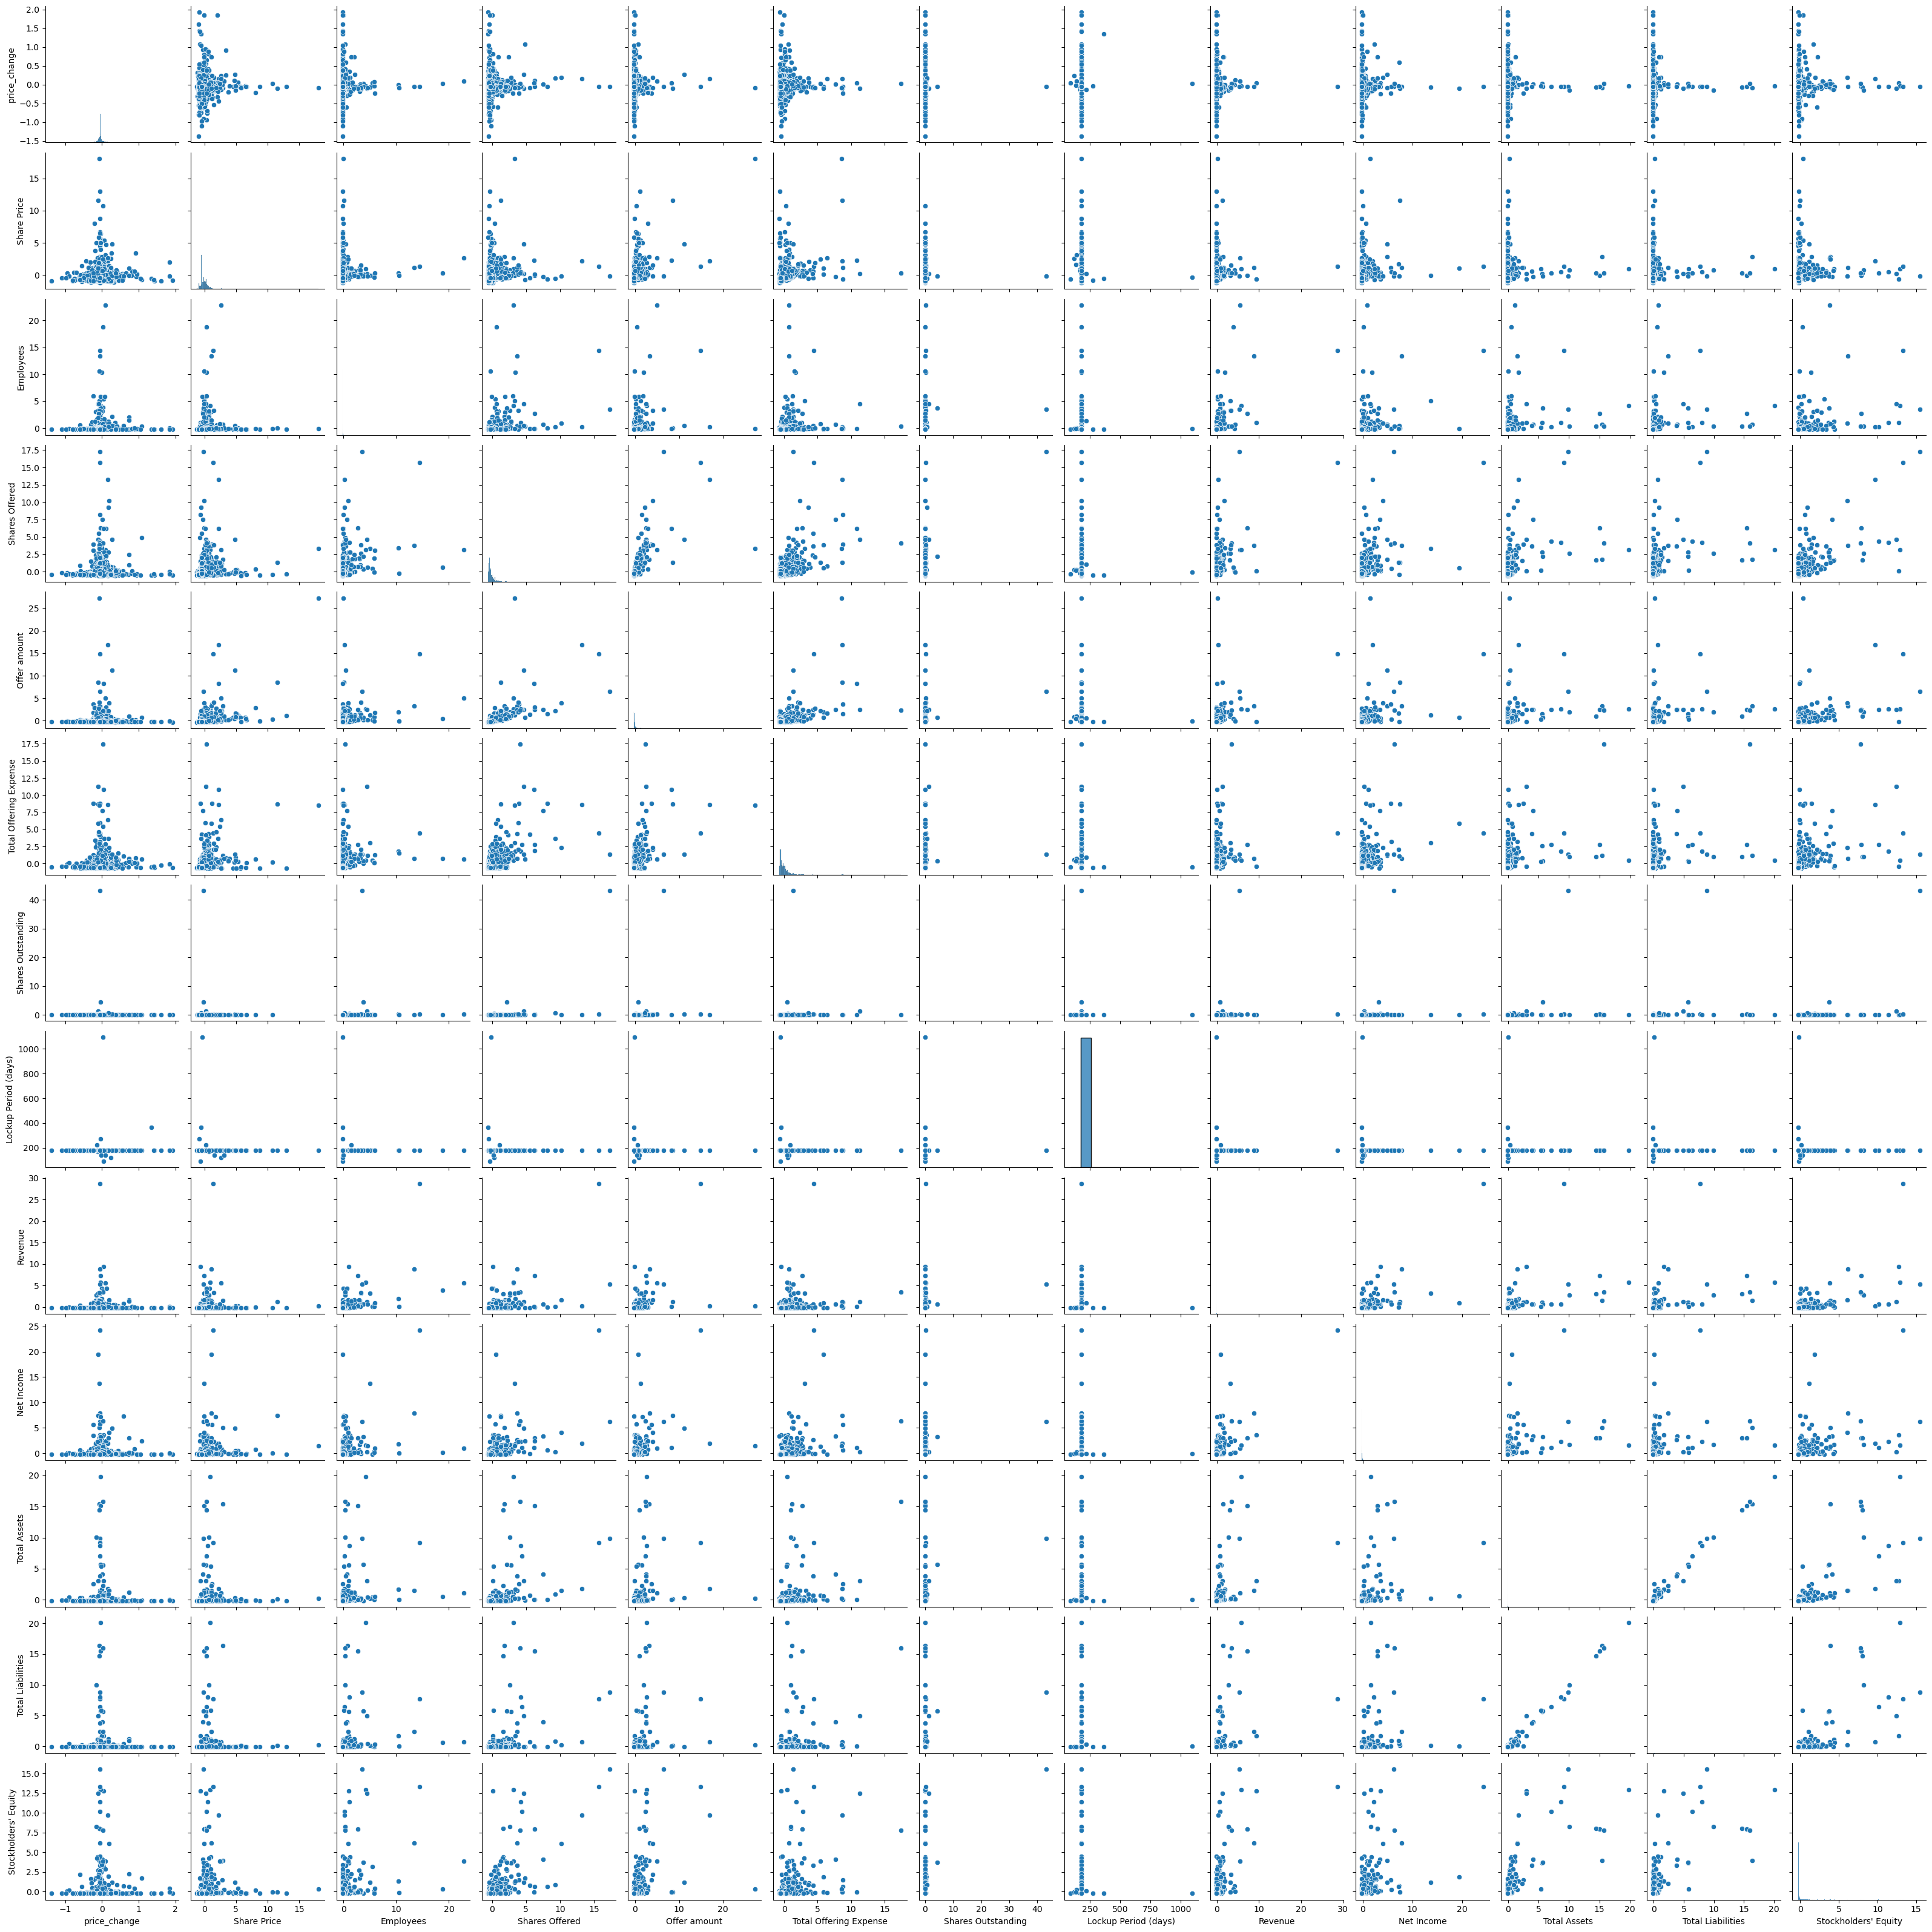

In [37]:
sns.pairplot(df[[ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']])

### Time to create a model and see how we do

In [76]:
import statsmodels.api as sm
df = df[(~ df.isna()) | (~ df.isnull())]
x = df[['Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding', 'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']]
x = sm.add_constant(x)
y = df['price_change']

model = sm.OLS(y, x, missing = 'drop')
fit = model.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_change   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7474
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.693
Time:                        20:52:07   Log-Likelihood:                -1427.1
No. Observations:                1009   AIC:                             2878.
Df Residuals:                     997   BIC:                             2937.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.048e-16      0.032  -2.55e-14      1.000      -0.062       0.062
Share Price               -0.1069      0.085     -1.255      0.210      -0.274       0.060
Employees                 -0.0376      0.043     -0.868      0.386      -0.122       0.047
Shares Offered            -0.2386      0.160     -1.491      0.136      -0.552       0.075
Offer amount               0.3083      0.192      1.607      0.108      -0.068       0.685
Total Offering Expense     0.0435      0.045      0.959      0.338      -0.045       0.132
Shares Outstanding        -0.0202      0.042     -0.478      0.633      -0.103       0.063
Revenue                    0.0568      0.050      1.145      0.252      -0.041       0.154
Net Income                -0.0461      0.039     -1.171      0.242      -0.123       0.031
Total Assets               0.0108      0.111      0.097      0.922      -0.207       0.229
Total Liabilities          0.0298      0.100      0.298      0.766      -0.167       0.227
Stockholders' Equity      -0.0331      0.051     -0.644      0.519      -0.134       0.068
==============================================================================
Omnibus:                      559.130   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9103.689
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      17.058   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Takeaways
<br>

- Colinearity will be a problem
  - We will need to pay special attention to our feature selection and engineering
- As it is our variables do not hold much predictive power
- We should try to explore other features
- It may help to explore stock prices at different dates

array([[<AxesSubplot:title={'center':'price_change'}>,
        <AxesSubplot:title={'center':'Share Price'}>,
        <AxesSubplot:title={'center':'Employees'}>],
       [<AxesSubplot:title={'center':'Shares Offered'}>,
        <AxesSubplot:title={'center':'Offer amount'}>,
        <AxesSubplot:title={'center':'Total Offering Expense'}>],
       [<AxesSubplot:title={'center':'Shares Outstanding'}>,
        <AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Net Income'}>],
       [<AxesSubplot:title={'center':'Total Assets'}>,
        <AxesSubplot:title={'center':'Total Liabilities'}>,
        <AxesSubplot:title={'center':"Stockholders' Equity"}>]],
      dtype=object)

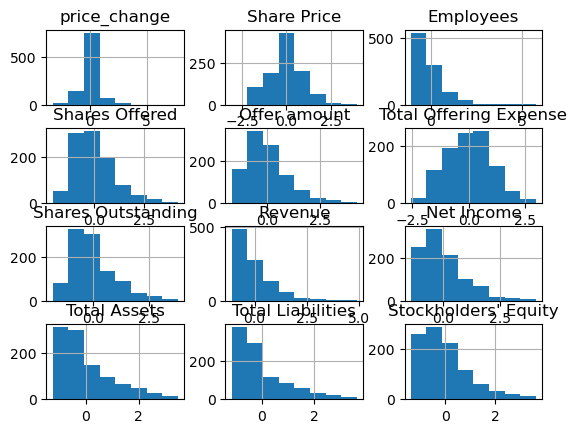

In [72]:
df[cols_of_interest].hist(bins=8)

In [40]:
df[[ 'price_change', 'Share Price', 'Employees',
       'Shares Offered', 'Offer amount', 'Total Offering Expense',
        'Shares Outstanding','Lockup Period (days)',
        'Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders\' Equity']].describe()

,price_change,Share Price,Employees,Shares Offered,Offer amount,Total Offering Expense,Shares Outstanding,Lockup Period (days),Revenue,Net Income,Total Assets,Total Liabilities,Stockholders' Equity
count,1947.000000,1945.000000,1946.000000,1944.000000,1946.000000,1912.000000,1883.000000,1946.000000,1330.000000,1896.000000,1930.000000,1925.000000,1929.000000
mean,-0.042295,0.001907,0.000785,0.001817,0.001120,0.000552,0.000167,180.502055,0.001031,0.000925,0.000489,0.000489,0.000556
std,0.188237,1.001408,1.002501,1.002057,1.002394,1.000471,1.002385,21.466929,1.003291,1.002543,1.002544,1.002563,1.002333
min,-1.377858,-1.208487,-0.176856,-0.574078,-0.312601,-0.715334,-0.037497,90.000000,-0.180306,-0.215196,-0.136610,-0.124621,-0.221112
25%,-0.079879,-0.437782,-0.176437,-0.409757,-0.251082,-0.513060,-0.034778,180.000000,-0.176877,-0.212631,-0.136371,-0.124439,-0.220133
50%,-0.054674,-0.129192,-0.168199,-0.239502,-0.183135,-0.204403,-0.032485,180.000000,-0.163045,-0.183029,-0.131817,-0.122048,-0.197457
75%,-0.024822,0.179399,-0.118217,0.101010,-0.053819,0.146252,-0.027614,180.000000,-0.109300,-0.104624,-0.104844,-0.102585,-0.123224
max,1.926165,18.077655,22.859848,17.296824,27.293538,17.409651,43.205372,1095.000000,28.692755,24.269058,19.823593,20.044899,15.507686


In [41]:
for col in cols_of_interest:
    print(len(df[df[col] > 2]))

0
46
29
53
28
45
2
16
36
19
18
35
